# 한글 자연어 처리(한글 분석)



### 1. Jpype 다운로드
- java 환경설정
    - 고급시스템 설정에서 JAVA_HOME 변수 설정, 값에 자바 경로 설정
    - path : %JAVA_HOME%\bin 추가
  
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- 파이썬 버전에 맞게 다운로드(__Python 3.10.9__)
- Anaconda Prompt 에서 아래 명령어 실행
    - `pip install C:\Users\admin\Documents\JPype1-1.4.0-cp310-cp310-win_amd64.whl`
    - `pip install konlpy`
    

In [2]:
from konlpy.tag import *
Hannanum = Hannanum()
import konlpy
konlpy.__version__

'0.6.0'

### 2. 말뭉치 불러오기 
- 대한민국 헌법 말뭉치 

In [3]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [4]:
c=kolaw.open('constitution.txt').read()
print(c[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [5]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [6]:
d=kobill.open('1809890.txt').read()
print(d[:1000])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).

- 1 -

법률  제        호

지방공무원법 일부개정법률안

지방공무원법 일부를 다음과 같이 개정한다.

제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제63조(휴직) ① (생  략)

제63조(휴직) ① (현행과 같음)

  ② 공무원이 다음 각 호의 어

  ② -------------------------

느 하나에 해당하는 사유로 휴

----------------------------

직을 원하면 임용권자는 휴직

----------------------------

을 명할 수 있다. 다만, 제4호

-------------.---------------

의 경우에는 대통령령으로 정

----------------------------

하는 특별한 사정이 없으면 휴

----------------------------

직을 명하여야 한다.

--------------.

  1. ∼ 3.

### 3. 형태소 분석
- konlpy의 형태소 분석, 태깅 라이브러리
    - Hannanum : 한나눔. KAIST Semantic Web Research Center 개발
        - http://semanticweb.kaist.ac.kr/hannanum/
    - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
        - http://kkma.snu.ac.kr/
    - Komoran: 코모란. Shineware에서 개발.
        - https://github.com/shin285/KOMORAN
    - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
        - https://github.com/open-korean-text/open-korean-text
- 여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 예제로 포함하였다.

In [7]:
from konlpy.tag import *
hannanum=Hannanum()
kkma=Kkma()
komoran=Komoran()
okt=Okt()

#### 3.1. 형태소 분석기 공통적 기능
- __nouns__      : 명사 추출
- __mprphs__    : 형태 추출
- __pos__          : 형태소 추출과 품사 태깅

In [8]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [9]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [10]:
komoran.nouns(c[:40])

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [11]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

In [12]:
s='텍스트 분석은 어려워요 ㅠㅠ'
okt.pos(s)

[('텍스트', 'Noun'),
 ('분석', 'Noun'),
 ('은', 'Josa'),
 ('어려워요', 'Adjective'),
 ('ㅠㅠ', 'KoreanParticle')]

In [13]:
okt.morphs(s)

['텍스트', '분석', '은', '어려워요', 'ㅠㅠ']

In [15]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [16]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [18]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [19]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [42]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [43]:
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)

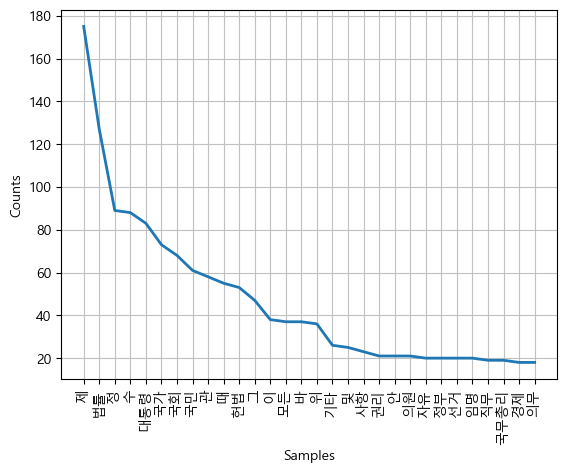

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
kolaw=Text(okt.nouns(c), name='kolaw')
kolaw.plot(30)

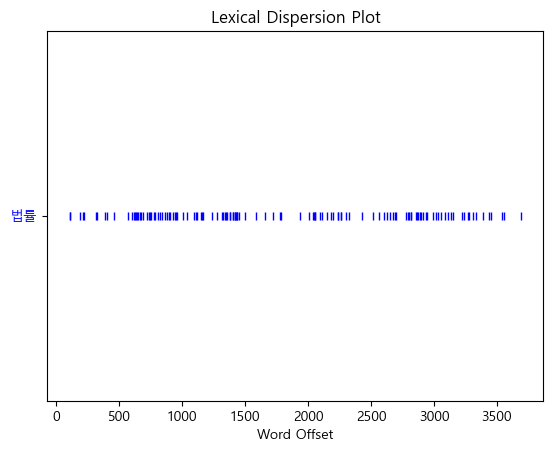

In [29]:
kolaw.dispersion_plot(['법률'])

In [32]:
kv=kolaw.vocab()
type(kv)
kv1=kv.most_common(10)
kv1

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55)]

In [38]:
kv2=dict()
for tag, count in kv1:
    print(tag, count)

제 175
법률 127
정 89
수 88
대통령 83
국가 73
국회 68
국민 61
관 58
때 55


In [39]:
kv3=dict()
for tag, count in kv.items():
    if(len(tag))>1:
        kv3[tag]=count

kv3

{'대한민국': 11,
 '헌법': 53,
 '유구': 1,
 '역사': 1,
 '전통': 1,
 '우리': 3,
 '국민': 61,
 '운동': 2,
 '건립': 1,
 '임시정부': 1,
 '통과': 1,
 '불의': 2,
 '항거': 1,
 '민주': 6,
 '이념': 1,
 '계승': 2,
 '조국': 3,
 '개혁': 1,
 '평화': 6,
 '통일': 6,
 '사명': 2,
 '각하': 1,
 '정의': 1,
 '인도': 1,
 '동포': 1,
 '로써': 5,
 '민족': 3,
 '단결': 1,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '폐습': 1,
 '타파': 1,
 '자율': 2,
 '조화': 2,
 '바탕': 1,
 '자유민주': 2,
 '질서': 8,
 '더욱': 1,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '각인': 1,
 '기회': 3,
 '능력': 3,
 '최고': 2,
 '도로': 1,
 '발휘': 1,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '완수': 1,
 '생활': 8,
 '향상': 5,
 '기하': 1,
 '항구': 1,
 '세계': 1,
 '인류': 1,
 '공영': 1,
 '이바지': 1,
 '자손': 1,
 '안전': 1,
 '행복': 2,
 '확보': 1,
 '다짐': 1,
 '제정': 8,
 '개정': 6,
 '이제': 1,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '민주공화국': 1,
 '주권': 2,
 '권력': 1,
 '요건': 1,
 '법률': 127,
 '국가': 73,
 '재외국민': 1,
 '보호': 14,
 '영토': 2,
 '한반도': 1,
 '부속': 1,
 '도서': 1,
 '지향': 1,
 '입각': 1,
 '정책': 14,
 '수립': 7,
 '추진': 1,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '침략': 1,
 '전쟁': 1,
 '부인': 1,
 '국군': 4,

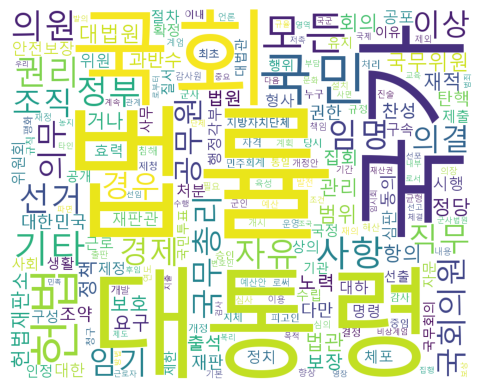

In [47]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/malgun.ttf'
wc=WordCloud(width=1000, height=800, background_color='white', font_path=font_path, random_state=0)
plt.imshow(wc.generate_from_frequencies(kv3))
plt.axis('off')
plt.savefig('data/wc1.png')
plt.show()

In [48]:
from collections import Counter

In [50]:
nouns=okt.nouns(c)
counter=Counter(nouns)
counter

Counter({'대한민국': 11,
         '헌법': 53,
         '유구': 1,
         '역사': 1,
         '전통': 1,
         '우리': 3,
         '국민': 61,
         '운동': 2,
         '건립': 1,
         '임시정부': 1,
         '법': 3,
         '통과': 1,
         '불의': 2,
         '항거': 1,
         '민주': 6,
         '이념': 1,
         '계승': 2,
         '조국': 3,
         '개혁': 1,
         '평화': 6,
         '통일': 6,
         '사명': 2,
         '입': 1,
         '각하': 1,
         '정의': 1,
         '인도': 1,
         '동포': 1,
         '애': 1,
         '로써': 5,
         '민족': 3,
         '단결': 1,
         '공고': 3,
         '모든': 37,
         '사회': 8,
         '폐습': 1,
         '타파': 1,
         '자율': 2,
         '조화': 2,
         '바탕': 1,
         '자유민주': 2,
         '질서': 8,
         '더욱': 1,
         '정치': 9,
         '경제': 18,
         '문화': 4,
         '영역': 4,
         '각인': 1,
         '기회': 3,
         '능력': 3,
         '최고': 2,
         '도로': 1,
         '발휘': 1,
         '자유': 20,
         '권리': 21,
         '책임': 5,


In [52]:
counter1=counter.most_common(10)
counter1

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55)]

In [54]:
counter2=dict()
for tag,count in counter1:
    if(len(tag)>1) and (count>1):
        counter2[tag]=count

counter2

{'법률': 127, '대통령': 83, '국가': 73, '국회': 68, '국민': 61}

In [55]:
counter3=dict()
for tag,count in counter.items():
    if(len(tag)>1) and (count>1):
        counter3[tag]=count

counter3

{'대한민국': 11,
 '헌법': 53,
 '우리': 3,
 '국민': 61,
 '운동': 2,
 '불의': 2,
 '민주': 6,
 '계승': 2,
 '조국': 3,
 '평화': 6,
 '통일': 6,
 '사명': 2,
 '로써': 5,
 '민족': 3,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '자율': 2,
 '조화': 2,
 '자유민주': 2,
 '질서': 8,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '기회': 3,
 '능력': 3,
 '최고': 2,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '생활': 8,
 '향상': 5,
 '행복': 2,
 '제정': 8,
 '개정': 6,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '주권': 2,
 '법률': 127,
 '국가': 73,
 '보호': 14,
 '영토': 2,
 '정책': 14,
 '수립': 7,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '국군': 4,
 '안전보장': 10,
 '국토': 3,
 '수행': 4,
 '중립성': 3,
 '준수': 2,
 '체결': 4,
 '공포': 10,
 '조약': 11,
 '일반': 2,
 '승인': 6,
 '효력': 9,
 '지위': 3,
 '보장': 13,
 '공무원': 17,
 '대한': 10,
 '대하': 9,
 '신분': 3,
 '정당': 14,
 '목적': 4,
 '조직': 18,
 '활동': 3,
 '의사': 2,
 '운영': 5,
 '위배': 2,
 '정부': 20,
 '헌법재판소': 14,
 '해산': 5,
 '제소': 3,
 '심판': 10,
 '발전': 5,
 '창달': 2,
 '인간': 3,
 '존엄': 2,
 '가지': 2,
 '개인': 3,
 '기본': 5,
 '누구': 6,
 '종교': 3,
 '차별': 2,
 '제도': 4,
 '인정': 8,
 '훈장': 2,
 '영전': 3,
 '신체': 3,
 '체포': 9,
